# **Veille Technique : Analyse et Preuve de Concept d'une Technique Récente de Classification d'Images**

**YOLO11n-cls pour la Classification d'Images**

Dans le cadre de cette mission, l'objectif est de réaliser une veille technique et de mettre en œuvre une preuve de concept (PoC) sur une technique récente de modélisation en data science. Michaël, notre référent, nous a confié cette tâche afin d'explorer les dernières avancées dans le domaine des données texte (NLP) ou des données d'images, en mettant en évidence leur efficacité par rapport à des méthodes plus classiques utilisées précédemment.

Pour cette étude, nous avons sélectionné une méthode récente, publiée il y a moins de 5 ans et référencée sur des plateformes de recherche de renom telles qu'Arxiv ou des ressources reconnues dans le domaine de la data science. Nous allons procéder en plusieurs étapes :

* État de l'art : Présentation de la technique choisie, ses concepts clés, et ses applications potentielles.

* Preuve de concept (PoC) : Mise en œuvre de cette technique sur des données d'image ou de texte déjà utilisées dans nos travaux antérieurs. Nous présenterons le pipeline de modélisation ainsi que les résultats obtenus.

* Comparaison avec des approches classiques : Une analyse comparative sera menée pour évaluer les performances de la méthode récente par rapport à des techniques précédemment explorées.

* Documentation et Présentation : Une note méthodologique et une présentation synthétiseront les résultats et les enseignements de cette étude.

Dans cette première phase, nous avons choisi d'explorer un modèle récent de classification d'images basé sur la famille YOLO (You Only Look Once), en utilisant la version allégée et optimisée YOLO11n-cls. Cette version a été adaptée pour des tâches de classification d'image et entraînera le modèle sur des données structurées et bien organisées.

Nous allons détailler la préparation des données, la structure des dossiers, le processus d'entraînement du modèle et, finalement, l'évaluation des performances. Ce travail permettra de répondre à la problématique de Michaël : démontrer la valeur ajoutée de techniques récentes dans un contexte applicatif concret.



**Import des librairies**

In [1]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
from ultralytics import YOLO

## **Préparation et Organisation des Données pour l'Entraînement**

In [2]:
# Chemins de base
base_path = 'C:/Users/Utilisateur/Desktop/Réalisez un dashboard et assurez une veille technique'
image_folder = os.path.join(base_path, 'images')
data_csv_path = os.path.join(base_path, 'data_texte_with_categories.csv')

# Charger les données CSV
data = pd.read_csv(data_csv_path)

# Créer les répertoires de train, val, test et leurs sous-répertoires de catégories
def create_folders(base_path, categories):
    for subdir in ['train', 'val', 'test']:
        for category in categories:
            clean_category = category.strip()
            os.makedirs(os.path.join(base_path, subdir, clean_category), exist_ok=True)

categories = data['Category_1'].unique()
create_folders(base_path, categories)

# Diviser les données en ensembles d'entraînement, validation et test
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Fonction pour déplacer les images dans les bons dossiers
def move_images(data, subdir):
    for _, row in data.iterrows():
        image_name = row['image']
        category = row['Category_1'].strip()
        src_path = os.path.join(image_folder, image_name)
        dest_path = os.path.join(base_path, subdir, category, image_name)

        if os.path.exists(src_path):
            shutil.copy(src_path, dest_path)
        else:
            print(f"Image non trouvée : {src_path}")

# Déplacer les images pour train, val et test
move_images(train_data, 'train')
move_images(val_data, 'val')
move_images(test_data, 'test')

print("Les images ont été organisées selon le format requis.")

Les images ont été organisées selon le format requis.


## **Entraînement du Modèle YOLO11n-cls sur le Dataset Préparé**

In [ ]:
from ultralytics import YOLO

# Chargez un modèle pré-entraîné pour la classification (yolo11n-cls)
model = YOLO("yolo11n-cls.pt")

# Entraînez le modèle sur votre dataset
results = model.train(data="C:/Users/Utilisateur/Desktop/Réalisez un dashboard et assurez une veille technique", epochs=2, imgsz=224,  batch=64)

In [7]:
results

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001C97A44A150>
curves: []
curves_results: []
fitness: 0.9000000059604645
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8095238208770752, 'metrics/accuracy_top5': 0.9904761910438538, 'fitness': 0.9000000059604645}
save_dir: WindowsPath('C:/Users/Utilisateur/Desktop/projet8/runs/classify/train')
speed: {'preprocess': 0.0, 'inference': 11.123069127400717, 'loss': 0.0, 'postprocess': 0.0}
task: 'classify'
top1: 0.8095238208770752
top5: 0.9904761910438538

**Tester une image à predire**

In [8]:
model = YOLO(r'C:\Users\Utilisateur\Desktop\Réalisez un dashboard et assurez une veille technique\runs\classify\train\weights\best.pt')
results = model(r'C:\Users\Utilisateur\Desktop\Réalisez un dashboard et assurez une veille technique\images\0e73201f6d8807776e1d21c969078289.jpg')
results[0].show()



image 1/1 C:\Users\Utilisateur\Desktop\Ralisez un dashboard et assurez une veille technique\images\0e73201f6d8807776e1d21c969078289.jpg: 640x640 Kitchen & Dining 0.95, Watches 0.03, Computers 0.01, Home Decor & Festive Needs 0.00, Beauty and Personal Care 0.00, 86.3ms
Speed: 76.5ms preprocess, 86.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


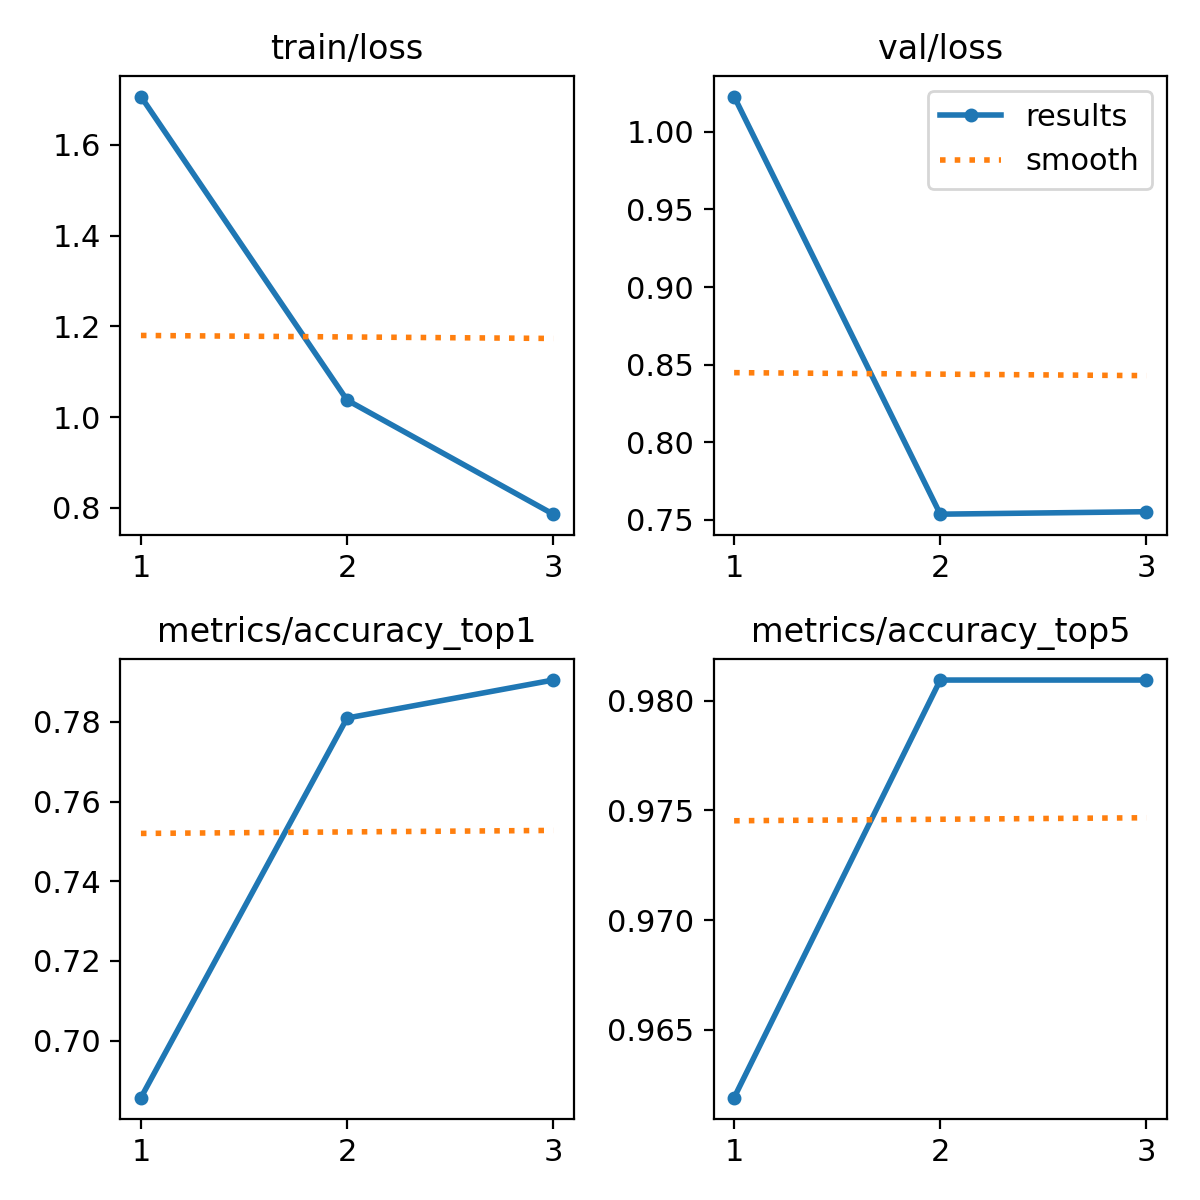

In [11]:
from IPython.display import Image

# Chemin vers l'image des résultats
image_path = r"C:\Users\Utilisateur\Desktop\Réalisez un dashboard et assurez une veille technique\runs\classify\train\results.png"

# Affichage de l'image des résultats
Image(image_path, width=600)

## **Feature importance des images**

yolo_cam on peut le cloner directement a travers ce lien github

In [47]:
!git clone https://github.com/rigvedrs/YOLO-V11-CAM.git

fatal: destination path 'YOLO-V11-CAM' already exists and is not an empty directory.


In [48]:
import sys
sys.path.append(r'C:\Users\Utilisateur\Desktop\Réalisez un dashboard et assurez une veille technique/YOLO-V11-CAM')

In [49]:
pip install ttach

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  # Suppress Matplotlib warnings

In [51]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

In [52]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [53]:
# Chargement de l'image
img = cv2.imread(r'C:\Users\Utilisateur\Desktop\Réalisez un dashboard et assurez une veille technique\train\Watches\4aa047f14885c74f155ce5f973e14dff.jpg')
img = cv2.resize(img, (640, 640))  # Redimensionnement de l'image
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir en RGB pour affichage
img = np.float32(img) / 255  # Normalisation de l'image

In [54]:
# Chargement du modèle YOLO
model = YOLO('models/yolo11n-cls.pt')
model = model.cpu()

In [55]:
# Configuration de la couche cible pour EigenCAM
target_layers = [model.model.model[-2]]  # Dernière couche avant la sortie
cam = EigenCAM(model, target_layers, task='cls')  # Initialisation de EigenCAM


0: 224x224 analog_clock 0.41, wall_clock 0.22, magnetic_compass 0.15, digital_watch 0.11, stopwatch 0.04, 32.9ms
Speed: 15.5ms preprocess, 32.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


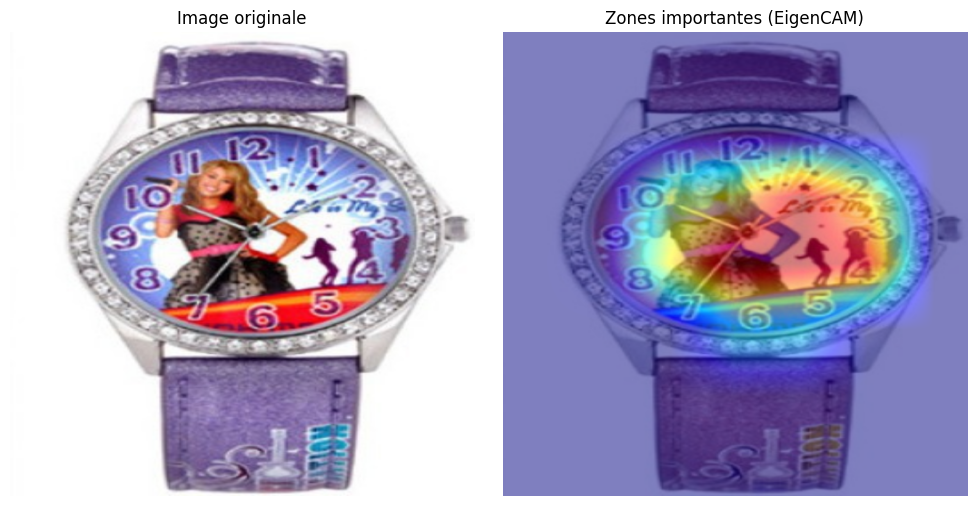

In [58]:
%matplotlib inline
# Calcul de la carte thermique
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

# Affichage des images côte à côte
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(rgb_img)  # Image originale
axes[0].axis('off')
axes[0].set_title("Image originale")

axes[1].imshow(cam_image)  # Image avec superposition CAM
axes[1].axis('off')
axes[1].set_title("Zones importantes (EigenCAM)")

plt.tight_layout()
plt.show()

**Tester une image pour predire**

In [40]:
model = YOLO(r'C:\Users\Utilisateur\Desktop\Réalisez un dashboard et assurez une veille technique\runs\classify\train\weights\best.pt')
results = model(r"C:\Users\Utilisateur\Desktop\Réalisez un dashboard et assurez une veille technique\train\Watches\3a7b224bf1bc9cee9052f9c9df0355f6.jpg")
results[0].show()


image 1/1 C:\Users\Utilisateur\Desktop\Ralisez un dashboard et assurez une veille technique\train\Watches\3a7b224bf1bc9cee9052f9c9df0355f6.jpg: 640x640 Watches 0.98, Kitchen & Dining 0.01, Beauty and Personal Care 0.00, Computers 0.00, Baby Care 0.00, 114.5ms
Speed: 67.7ms preprocess, 114.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


**Matrice de confusion**

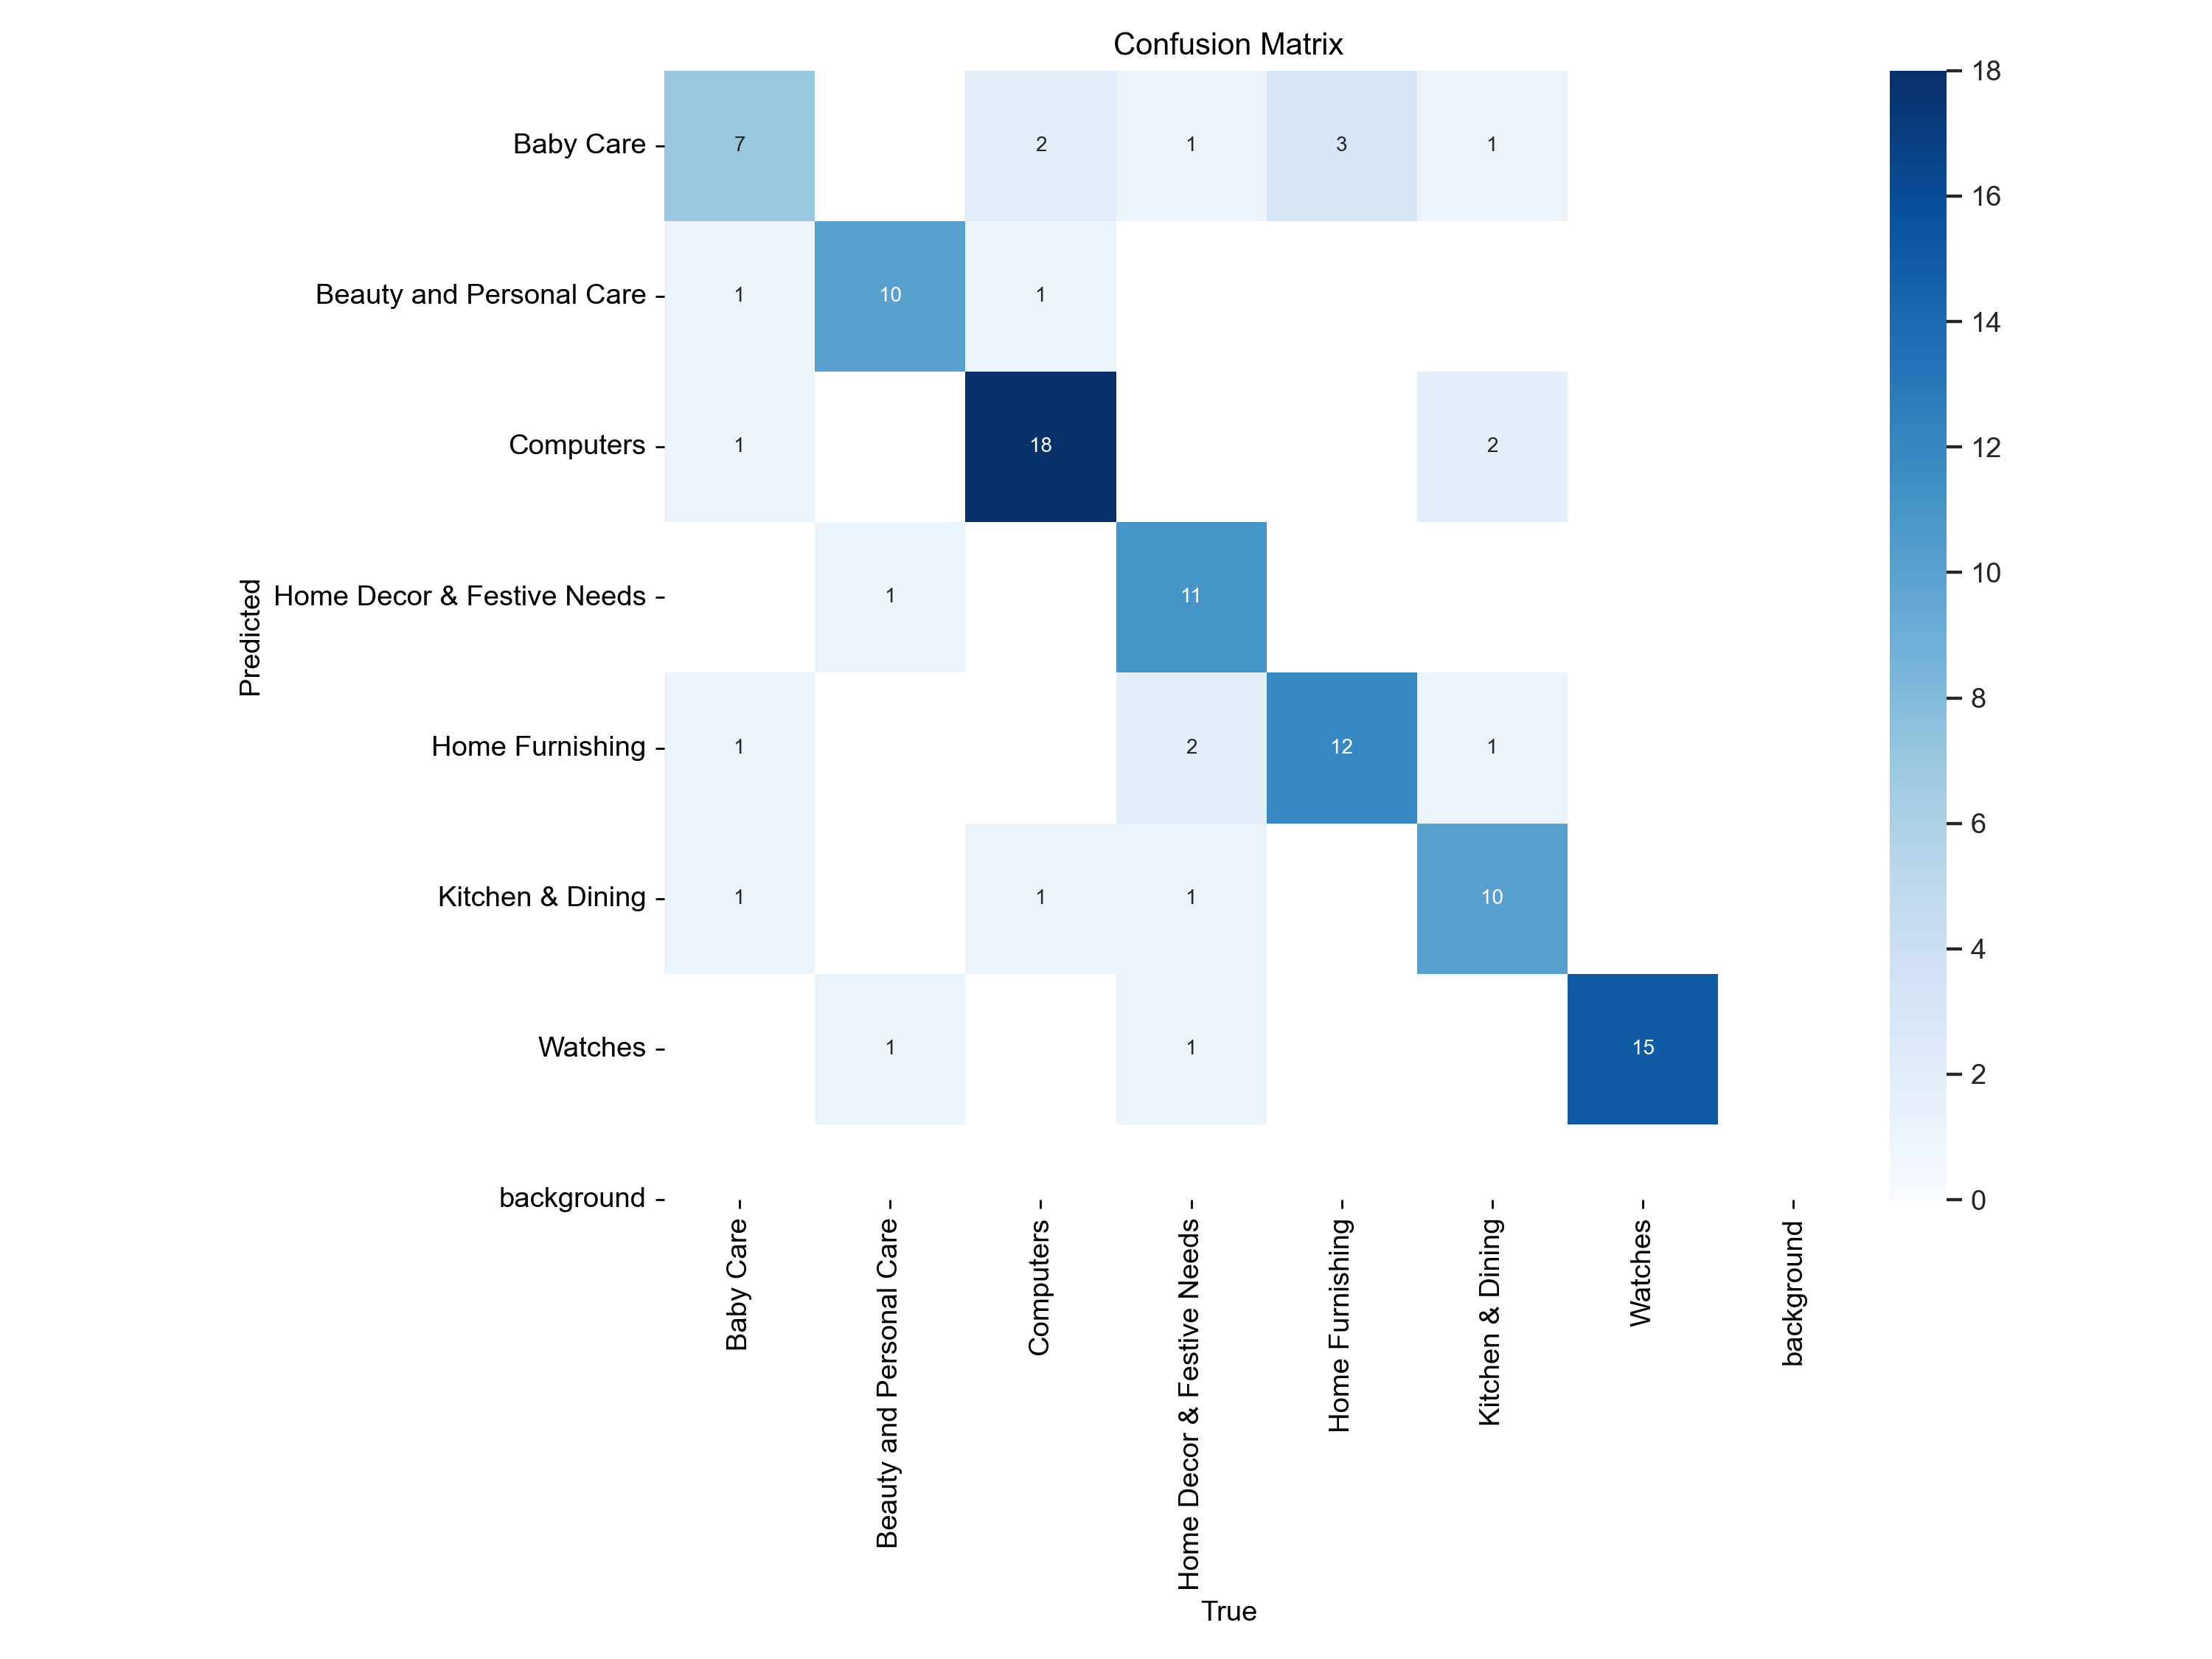

In [44]:
from IPython.display import Image

# Chemin vers la matrice de confusion
confusion_matrix_path = r"C:\Users\Utilisateur\Desktop\Réalisez un dashboard et assurez une veille technique\runs\classify\train\confusion_matrix.png"

# Affichage de la matrice de confusion
Image(confusion_matrix_path, width=600)

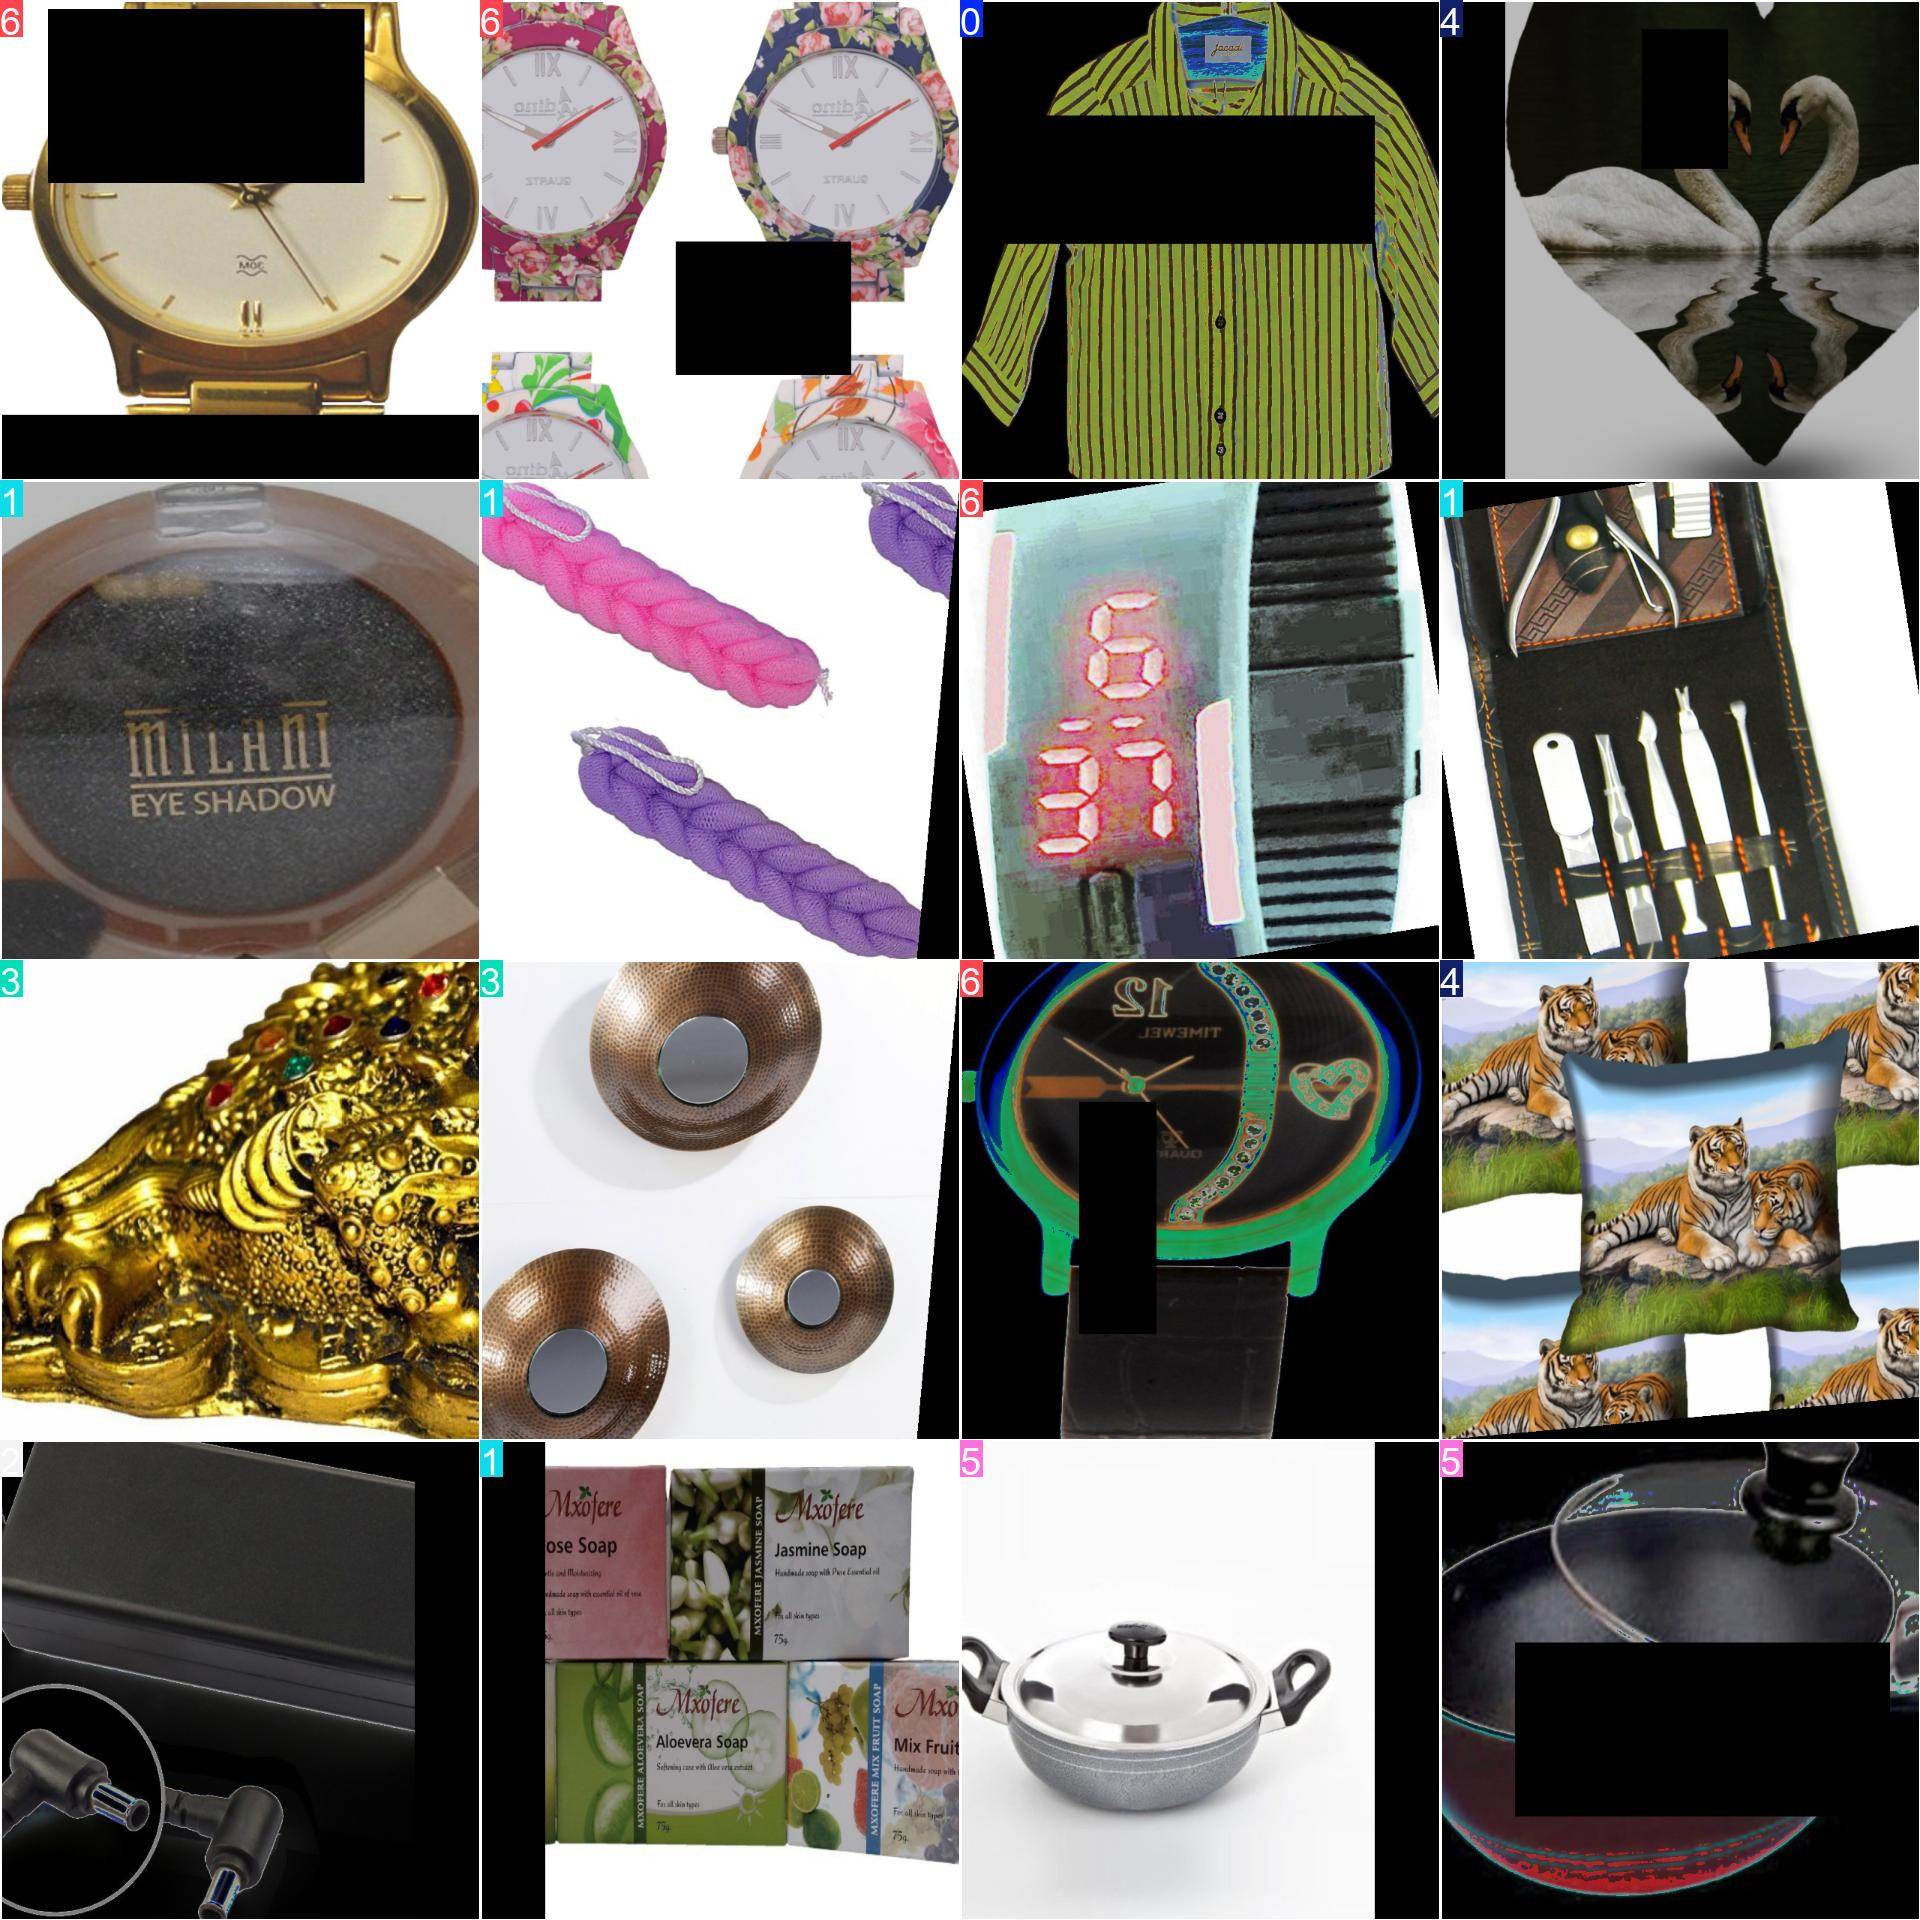

In [45]:
# Exemple pour afficher une image de batch d'entraînement
train_batch_path = r"C:\Users\Utilisateur\Desktop\Réalisez un dashboard et assurez une veille technique\runs\classify\train\train_batch0.jpg"
Image(train_batch_path, width=600)

**Si on souhaite obtenir des infos plus détaillées sur la performance du modèle, on peut consulter le fichier results.csv ou events.out.tfevents**

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du fichier CSV
results_csv_path = r"C:\Users\Utilisateur\Desktop\Réalisez un dashboard et assurez une veille technique\runs\classify\train\results.csv"
results_df = pd.read_csv(results_csv_path)

# Affichage des premières lignes du fichier CSV
results_df.head()

,epoch,time,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,493.967,1.70625,0.68571,0.96190,1.02268,0.000234,0.000234,0.000234
1,2,1020.660,1.03743,0.78095,0.98095,0.75367,0.000316,0.000316,0.000316
2,3,1413.960,0.78615,0.79048,0.98095,0.75526,0.000241,0.000241,0.000241


In [ ]:
#%load_ext tensorboard

In [ ]:
#%tensorboard --logdir /content/runs

## **Amélioration des performances du modèle**

1. **Augmentation des données (Data Augmentation)**

In [14]:
from ultralytics import YOLO

# Charger un modèle pré-entraîné YOLOv11 pour la classification
model = YOLO("yolo11n-cls.pt")

# Entraîner le modèle avec data augmentation activée
results = model.train(
    data="C:/Users/Utilisateur/Desktop/Réalisez un dashboard et assurez une veille technique",  # Chemin vers le fichier de configuration de votre dataset
    epochs=2,                   # Nombre d'époques d'entraînement
    imgsz=240,                   # Taille des images
    batch=64,                    # Taille du batch
    #augment=True,                # Activer la data augmentation (option par défaut)
    mosaic=True,                 # Activer la Mosaic Augmentation (recommandé)
    hsv_h=0.015,                 # Augmentation de la teinte
    hsv_s=0.7,                   # Augmentation de la saturation
    hsv_v=0.4,                   # Augmentation de la valeur (lumière)
    degrees=10,                  # Rotation aléatoire
    translate=0.1,               # Translation aléatoire
    scale=0.5,                   # Zoom aléatoire
    shear=0.1                    # Shearing (cisaillement) aléatoire
)

# Résultats
print("Entraînement terminé ! Les checkpoints sont sauvegardés dans le dossier runs/train.")

New https://pypi.org/project/ultralytics/8.3.54 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.53  Python-3.12.7 torch-2.5.1+cpu CPU (Intel Core(TM) i7-8650U 1.90GHz)
engine\trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=C:/Users/Utilisateur/Desktop/projet8, epochs=20, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

train: Scanning C:\Users\Utilisateur\Desktop\projet8\train... 840 images, 0 corrupt: 100%|██████████| 840/840 [00:00<?, ?it/s]
val: Scanning C:\Users\Utilisateur\Desktop\projet8\val... 105 images, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\Users\Utilisateur\Desktop\projet8\runs\classify\train7
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size



       1/20         0G      1.984         64        640:   7%|▋         | 1/14 [02:27<31:51, 147.01s/it]


KeyboardInterrupt: 

## **Tester en modifiant un paramètre comme le learning rate ou le dropout**

In [ ]:
# Fonction pour entraîner 
def create_model_fct(learning_rate, dropout_rate):
    from ultralytics import YOLO

    def train_model():
        # Charger un modèle YOLOv11 pré-entraîné
        model = YOLO("yolo11n-cls.pt")

        # Entraîner avec les paramètres spécifiés
        results = model.train(
            data="C:/Users/Utilisateur/Desktop/Réalisez un dashboard et assurez une veille technique",
            epochs=2,
            imgsz=240,
            batch=64,
            #augment=True,
            mosaic=True,
            hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=10, translate=0.1, scale=0.5, shear=0.1,
            lr0=learning_rate,
            dropout=dropout_rate,
            name=f"lr_{learning_rate}_dr_{dropout_rate}"  # Nom du run
        )
        return results

    return train_model

# Configuration des modèles avec différentes combinaisons de learning_rate et dropout_rate
models = {
    'model_lr_0.0001_dr_0.5': create_model_fct(learning_rate=0.0001, dropout_rate=0.5),
    'model_lr_0.0001_dr_0.3': create_model_fct(learning_rate=0.0001, dropout_rate=0.3),
    #'model_lr_0.001_dr_0.5': create_model_fct(learning_rate=0.001, dropout_rate=0.5),
    #'model_lr_0.001_dr_0.3': create_model_fct(learning_rate=0.001, dropout_rate=0.3),
}

# Boucle pour entraîner tous les modèles
for model_name, train_function in models.items():
    print(f"Entraînement du modèle : {model_name}")
    results = train_function()

# **Conclusion Générale**

L'implémentation de YOLO11n-cls a permis de démontrer l'efficacité de cette méthode récente pour la classification multi-classe d'images. Le modèle offre une bonne précision tout en étant rapide et optimisé. Cependant, pour atteindre des niveaux de performance plus élevés (notamment en précision top-1), il pourrait être intéressant d'explorer des ajustements supplémentaires, comme :

L'optimisation des hyperparamètres (learning rate, batch size, etc.),
L'utilisation d'architectures légèrement plus complexes,
Ou la combinaison avec des stratégies avancées de prétraitement des données.
Ces résultats sont prometteurs et illustrent la valeur ajoutée des avancées récentes en apprentissage profond dans des contextes applicatifs concrets.